<a href="https://colab.research.google.com/github/zyrtecdos/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data as a pandas data frame.
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data')
df.describe()

,30,64,1,1.1
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [97]:
#Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
# Number of Instances: 306
print(df.shape)
print("\n")
! curl http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data | wc

(305, 4)


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3103  100  3103    0     0  49253      0 --:--:-- --:--:-- --:--:-- 49253
    306     306    3103


In [98]:
# Validate that you have no missing values.
print(df.isnull().sum())
print(df.isnull().sum().sum())
df.head(10)

30     0
64     0
1      0
1.1    0
dtype: int64
0


,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,2
7,34,66,9,2
8,34,58,30,1
9,34,60,1,1


In [99]:
# Add informative names to the features.
# Resource: http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names
colNames = ['Age Of Patient', 'Year Of Operation','Axillary Nodes Detected','Survival Status']
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None, names=colNames)
df.head()


,Age Of Patient,Year Of Operation,Axillary Nodes Detected,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [100]:
# The survival variable is encoded as 1 for surviving >5 years and 2 for not - 
# change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a 
# more traditional encoding of binary variables)
df['Survival Status'].replace(2, 0, inplace=True)
df.head(10)

,Age Of Patient,Year Of Operation,Axillary Nodes Detected,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [101]:
# Explore the data - create at least 2 tables (can be summary statistics or 
# crosstabulations)

# Rename again to shorter string for better visual
colNames = ['Age', 'Year','Nodes','Survive']
df2 = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None, names=colNames)
df2['Survive'].replace(2, 0, inplace=True)

# summary statistics
print("\nStatistic Information")
print(df2.describe())
print("\nExplore Correlation")
print(df2.corr())
print("\nExplore Variable Types")
print(df2.dtypes)



Statistic Information
              Age        Year       Nodes     Survive
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    0.735294
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    0.000000
25%     44.000000   60.000000    0.000000    0.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    1.000000
max     83.000000   69.000000   52.000000    1.000000

Explore Correlation
              Age      Year     Nodes   Survive
Age      1.000000  0.089529 -0.063176 -0.067950
Year     0.089529  1.000000 -0.003764  0.004768
Nodes   -0.063176 -0.003764  1.000000 -0.286768
Survive -0.067950  0.004768 -0.286768  1.000000

Explore Variable Types
Age        int64
Year       int64
Nodes      int64
Survive    int64
dtype: object


In [102]:
# turn data into bin (list) for better visualization
age_bins = pd.cut(df2['Age'], 5)
year_bins = pd.cut(df2['Year'], 5)
nodes_bins = pd.cut(df2['Nodes'], 10)

# crosstabulations Survive vs Age
pd.crosstab(age_bins, df2['Survive'], normalize='columns')

Survive,0,1
Age,,
"(29.947, 40.6]",0.049383,0.173333
"(40.6, 51.2]",0.382716,0.302222
"(51.2, 61.8]",0.333333,0.306667
"(61.8, 72.4]",0.197531,0.191111
"(72.4, 83.0]",0.037037,0.026667


In [103]:
# crosstabulations Survive vs Node
pd.crosstab(nodes_bins, df2['Survive'], normalize='columns')

Survive,0,1
Nodes,,
"(-0.052, 5.2]",0.567901,0.844444
"(5.2, 10.4]",0.148148,0.080000
"(10.4, 15.6]",0.135802,0.031111
"(15.6, 20.8]",0.049383,0.017778
"(20.8, 26.0]",0.074074,0.013333
"(26.0, 31.2]",0.000000,0.008889
"(31.2, 36.4]",0.012346,0.000000
"(36.4, 41.6]",0.000000,0.000000
"(41.6, 46.8]",0.000000,0.004444


In [104]:
# crosstabulations Survive vs Year
pd.crosstab(year_bins, df2['Survive'], normalize='columns')

Survive,0,1
Year,,
"(57.989, 60.2]",0.308642,0.293333
"(60.2, 62.4]",0.123457,0.173333
"(62.4, 64.6]",0.197531,0.200000
"(64.6, 66.8]",0.234568,0.164444
"(66.8, 69.0]",0.135802,0.168889


In [105]:
df2.corr()

,Age,Year,Nodes,Survive
Age,1.000000,0.089529,-0.063176,-0.067950
Year,0.089529,1.000000,-0.003764,0.004768
Nodes,-0.063176,-0.003764,1.000000,-0.286768
Survive,-0.067950,0.004768,-0.286768,1.000000


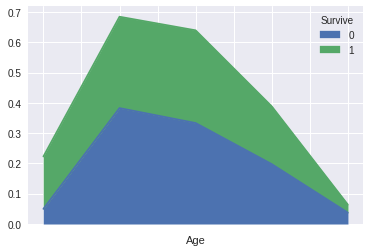

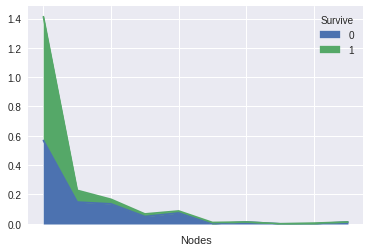

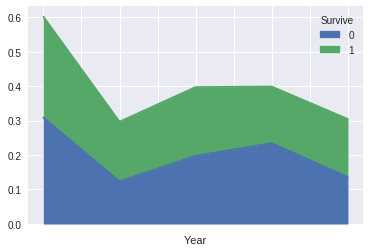

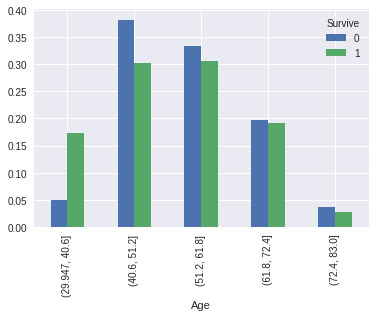

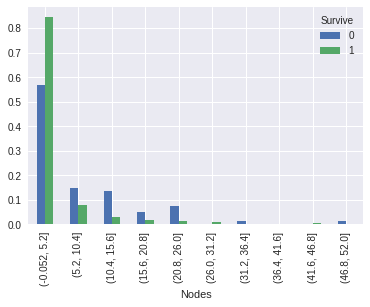

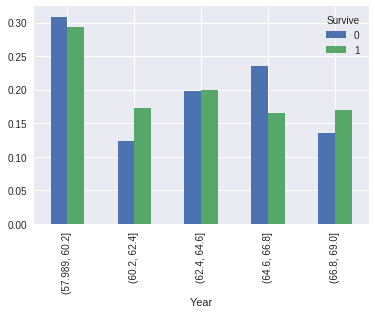

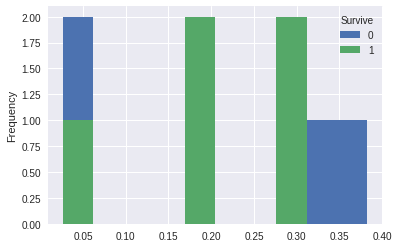

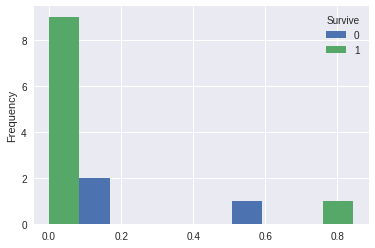

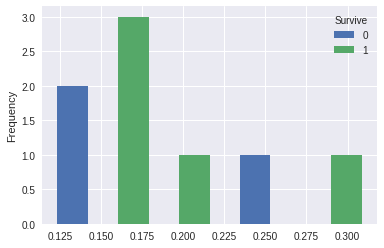

In [106]:
# and 2 plots illustrating the nature of the data.

# This is open-ended, so to remind - first complete this task as a baseline, 
# then go on to the remaining sections, and then as time allows revisit and explore further.
# Hint - you may need to bin some variables depending on your chosen tables/plots.

ax1 = pd.crosstab(age_bins, df2['Survive'], normalize='columns')
ax2 = pd.crosstab(nodes_bins, df2['Survive'], normalize='columns')
ax3 = pd.crosstab(year_bins, df2['Survive'], normalize='columns')

ax1.plot.area();
ax2.plot.area();
ax3.plot.area();

ax1.plot.bar();
ax2.plot.bar();
ax3.plot.bar();

ax1.plot.hist();
ax2.plot.hist();
ax3.plot.hist();

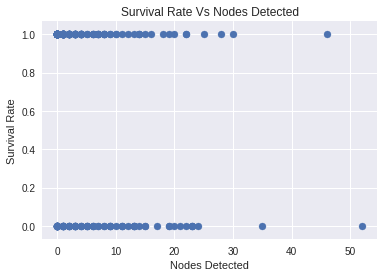

In [107]:
# Extra
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title('Survival Rate Vs Nodes Detected')
ax.set_xlabel('Nodes Detected')
ax.set_ylabel('Survival Rate')
ax.scatter(df2['Nodes'],df2['Survive'])
plt.show()

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?

From the correlation table, we can see that the year of operation has a positive relationship with survival rate.  Likewise, the bar and histogram graph confirm their relationship visually.

- What is at least one feature that looks to have a negative relationship with survival?

Number of positive axillary nodes detected has a negative relationship with survival rate.  The more nodes are detected, the rate of survival decrease.

- How are those two features related with each other, and what might that mean?

The two features are possibly related to each other in affecting the outcome of survival.  We can hypothesize that if low amount of nodes are detected and operation is performed early, the survival rate may increase.  Likewise, survival rate may decrease if the opposite occurs.

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.